In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [712]:
df = pd.read_csv("train.csv")


In [713]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [715]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [716]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [717]:
# Grouping according to titles
df["Title"] = df["Title"].replace(["Dr", "Rev", "Major", "Col", "the Countess", "Capt", "Don", "Jonkheer", "Lady", "Sir"], "Rare")
df["Title"] = df["Title"].replace(["Mlle", "Ms"], "Miss")
df["Title"] = df["Title"].replace("Mme", "Mrs")

df["Title"].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

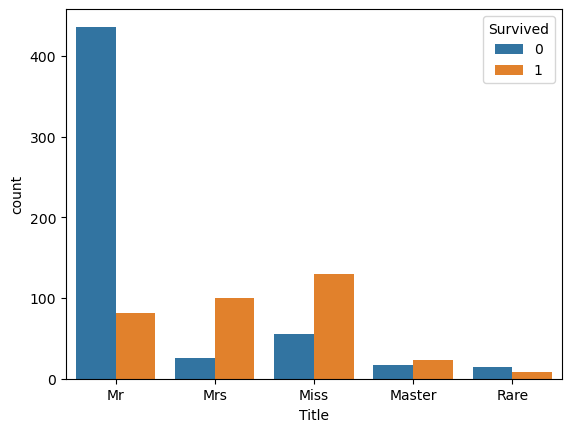

In [718]:
sns.countplot(data=df, x="Title",  hue="Survived")

In [719]:
df = df.drop(["Ticket", "Cabin", "PassengerId", "Name"], axis=1)

In [720]:
df.isnull().sum().T

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [721]:
## Filling null age values with the Pclass category age mean value
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda val: val.fillna(val.mean()))

In [727]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [728]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [729]:
## Filling null Embarked data with the Embarked mode "S" value 
df.loc[[61,829], "Embarked"] = "S"

In [730]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


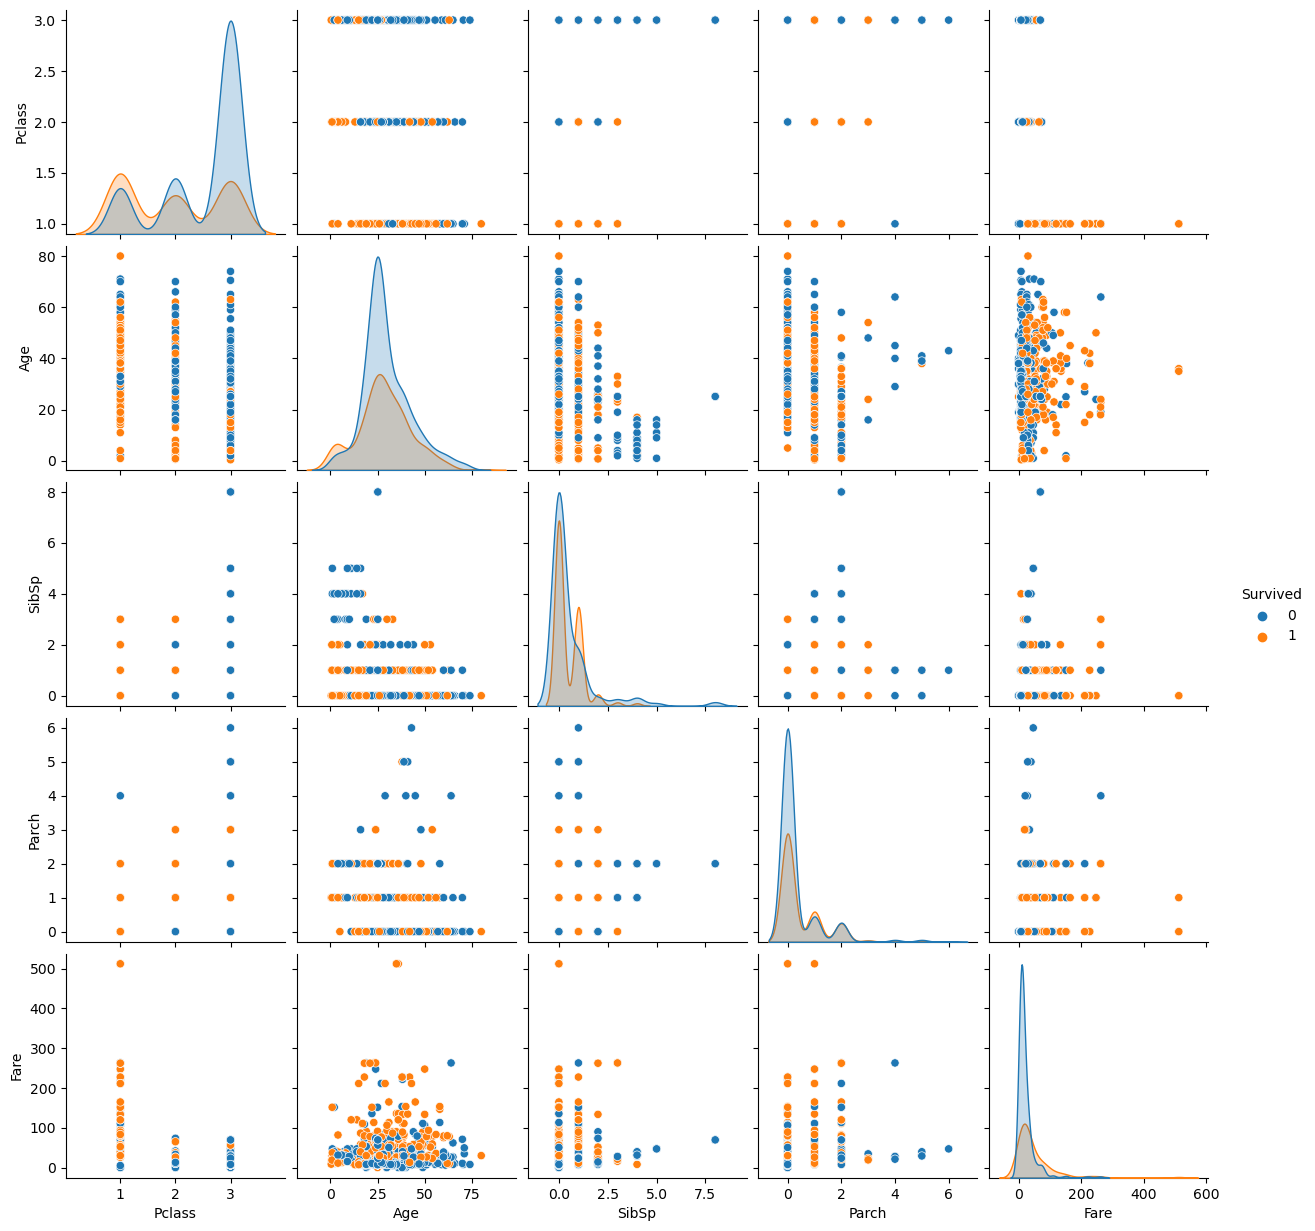

In [731]:
# Checking Outliers
sns.pairplot(df, hue="Survived")

<h2>Removing Outliers from Fare and SibSp </h2>

In [732]:
df = df[df["Fare"] < 450]

In [733]:
df = df[df["SibSp"] < 6]

In [734]:
# df = df[df["Age"] < 60]

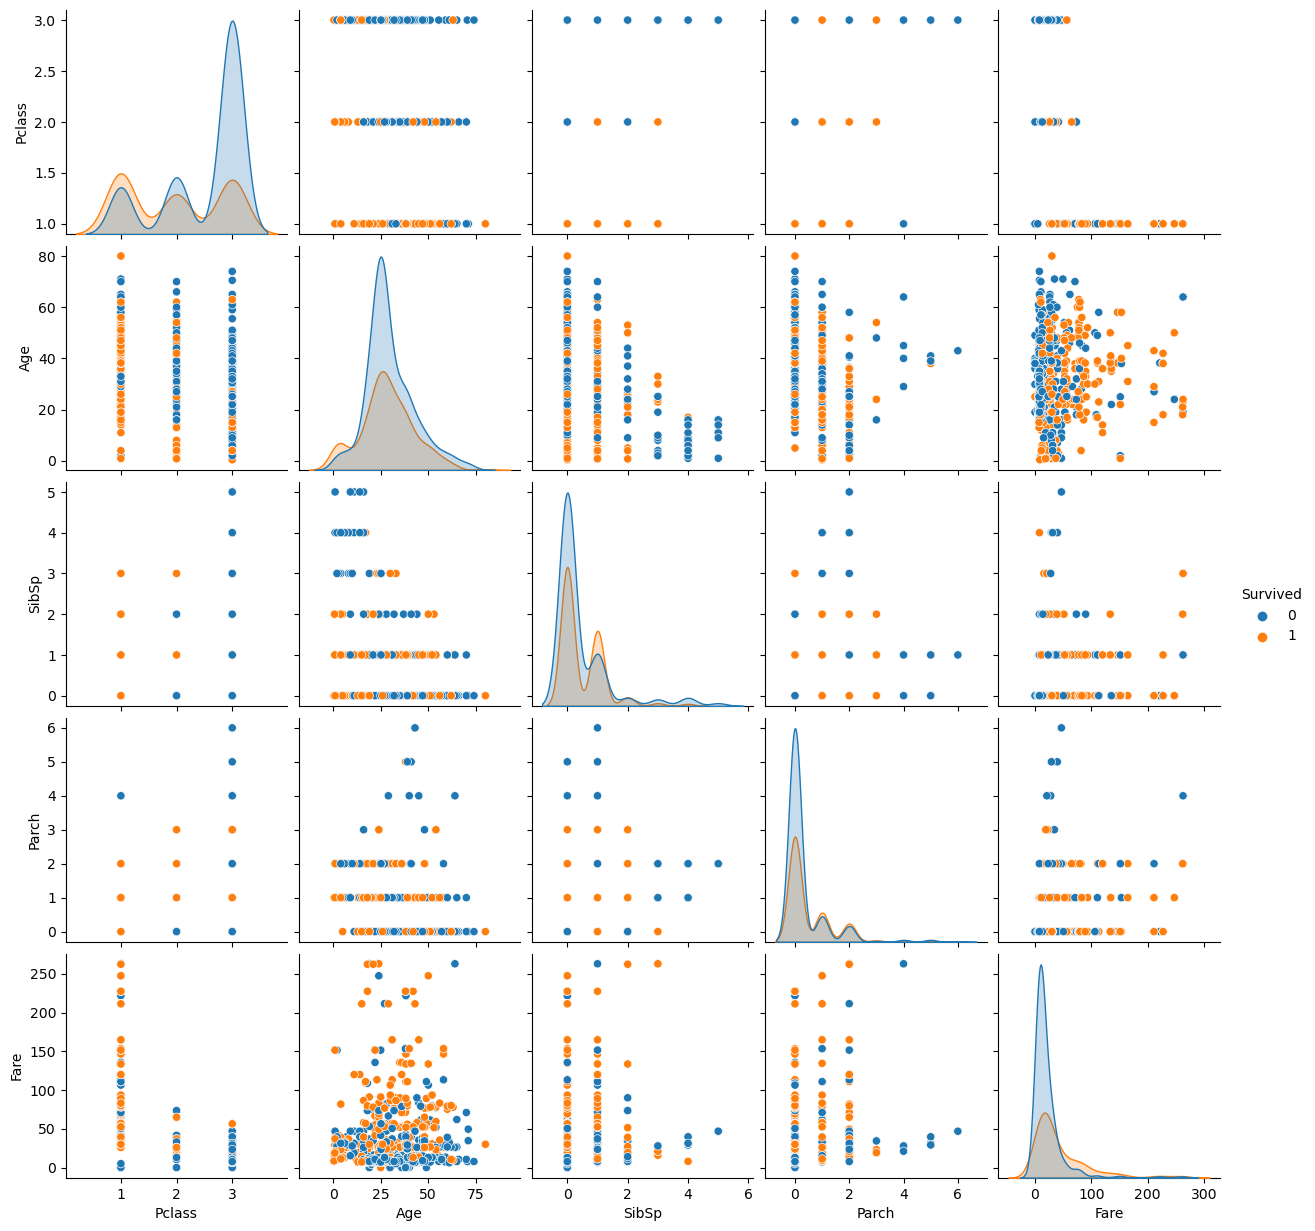

In [735]:
sns.pairplot(df, hue="Survived")

C:\Users\myy\AppData\Local\Temp\ipykernel_14236\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

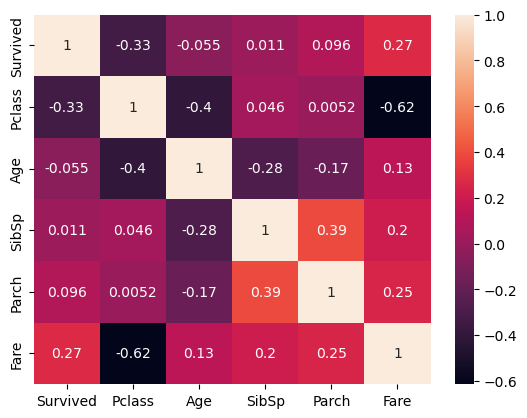

In [736]:
sns.heatmap(df.corr(), annot=True)

In [737]:
df["Fare"].describe()

count    881.000000
mean      30.272544
std       41.192295
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      263.000000
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

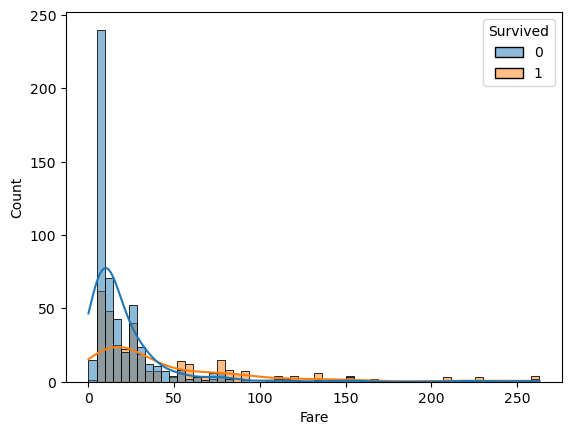

In [738]:
sns.histplot(data=df, x=df["Fare"], hue="Survived", kde=True)

In [739]:
# Normalizing Fare feature, because its skewed and 
df['Log_Fare'] = df['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

In [740]:
df = df.drop(["Fare"], axis=1)

<Axes: xlabel='Log_Fare', ylabel='Count'>

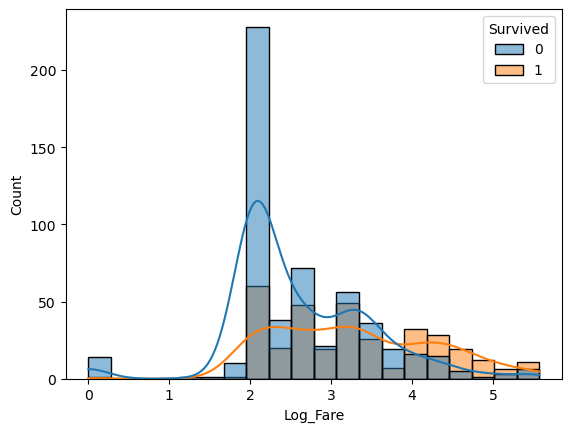

In [741]:
# This is much better with normalized Fare values
sns.histplot(data=df, x=df["Log_Fare"], hue="Survived", kde=True)

<Axes: >

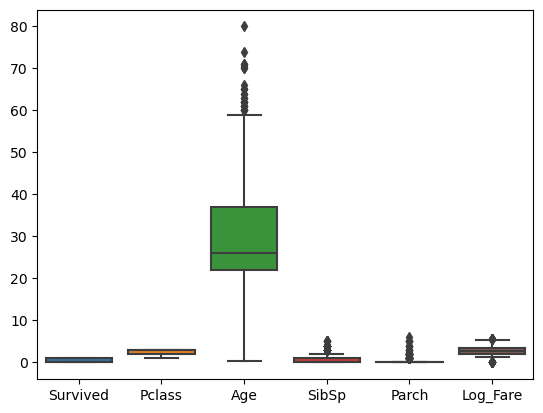

In [742]:
sns.boxplot(data=df)

In [743]:
len(df[df["Age"] > 60])

22

In [744]:
df["familySize"] = df["Parch"] + df["SibSp"] + 1
df["isAlone"] = df["familySize"].apply(lambda x: 1 if x==1 else 0 )
# df = df.drop(["Parch", "SibSp"], axis=1)
# Assuming df is your DataFrame and 'your_column' is the column you want to bin
df['familySize'] = pd.cut(df['familySize'], bins=4, labels=[1, 2, 3, 4]).astype(int)
# Assuming df is your DataFrame and 'your_column' is the column you want to bin
# df['Age'] = pd.cut(df['Age'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)

<Axes: >

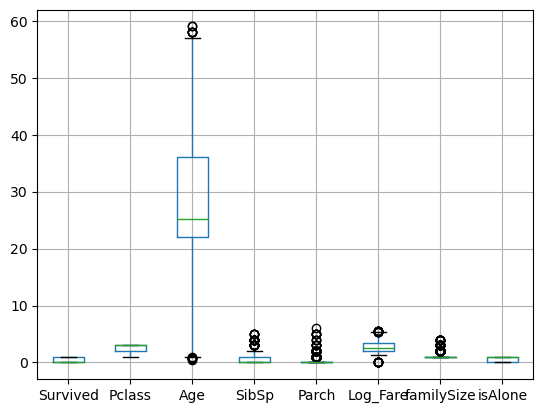

In [690]:
df.boxplot()

In [745]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler

In [746]:
X = df.drop(["Survived"], axis=1)
y= df["Survived"]


In [747]:
X = pd.get_dummies(X, dtype=float)

In [748]:
X.head()

,Pclass,Age,SibSp,Parch,Log_Fare,familySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,1,0,1.981001,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,38.0,1,0,4.266662,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,26.0,0,0,2.070022,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,35.0,1,0,3.972177,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3,35.0,0,0,2.085672,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [749]:
X = X.drop(["Sex_female"], axis=1)

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [751]:
scaler = StandardScaler()

In [752]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [753]:
log_model = LogisticRegression(solver="saga", max_iter=5000)

In [754]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [755]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [756]:
penalty = ["l1","l2", "elasticnet"]
C = np.logspace(-3, 3, 7)
l1_ratio = np.linspace(0,1,11)

grid_model = GridSearchCV(log_model, cv=10, param_grid={"C": C, "penalty": penalty, "l1_ratio": l1_ratio}, verbose=2)

In [757]:
grid_model.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 231 candidates, totalling 2310 fits
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ..................C

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ..................C=0.001, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ..........C=0.001, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ...C=0.001, l1_rati

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...C=0.001, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.8, penalty=l

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ..................C=0.001, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ..................C=0.001, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.001, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=0.01, l1_ratio

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END C=0.01, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .........

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_rati

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.8, penalty=l1; total time=   0

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.01, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.01, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ............C=0.1, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ............C=0.1, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ............C=0.1, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.3

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END C=0.1, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=0.1, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ....C=1.0, l1_ratio

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total t

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, 

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\l

[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....................C=1.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.1s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.1s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END ...C=10.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=10.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_rati

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.1s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total t

C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.1s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.1s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END ....C=10.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=0.9, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l1; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ...................C=10.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.1s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=10.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.0, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.1, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.2, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.2s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.4, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.5, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s
[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.2s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.4s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.4s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.4s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=100.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.2s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.4s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.4s
[CV] END C=100.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.8, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.4s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.4s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.4s
[CV] END ..........C=100.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=0.9, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.4s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.4s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.4s
[CV] END ..........C=100.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s
[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l1; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..................C=100.0, l1_ratio=1.0, penalty=l2; total time=   0.2s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s
[CV] END ..........C=100.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.0, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.1, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.7s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.2, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=1000.0, l1_ratio=0.30000000000000004, penalty=l2; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.30000000000000004, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.8s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.4, penalty=l2; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.7s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.7s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.9s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.9s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.7s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.9s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.8s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.7s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.8s
[CV] END .........C=1000.0, l1_ratio=0.4, penalty=elasticnet; total time=   1.1s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.7s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.8s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.7s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.5, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l1; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.6000000000000001, penalty=l2; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.6s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.6000000000000001, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=1000.0, l1_ratio=0.7000000000000001, penalty=l2; total time=   0.3s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.6s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s
[CV] END C=1000.0, l1_ratio=0.7000000000000001, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.8, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.6s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=0.9, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.6s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l1; total time=   0.5s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.4s


C:\Users\myy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .................C=1000.0, l1_ratio=1.0, penalty=l2; total time=   0.3s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.5s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s
[CV] END .........C=1000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.4s


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [758]:
grid_model.best_params_

{'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasticnet'}

<Figure size 1500x500 with 0 Axes>

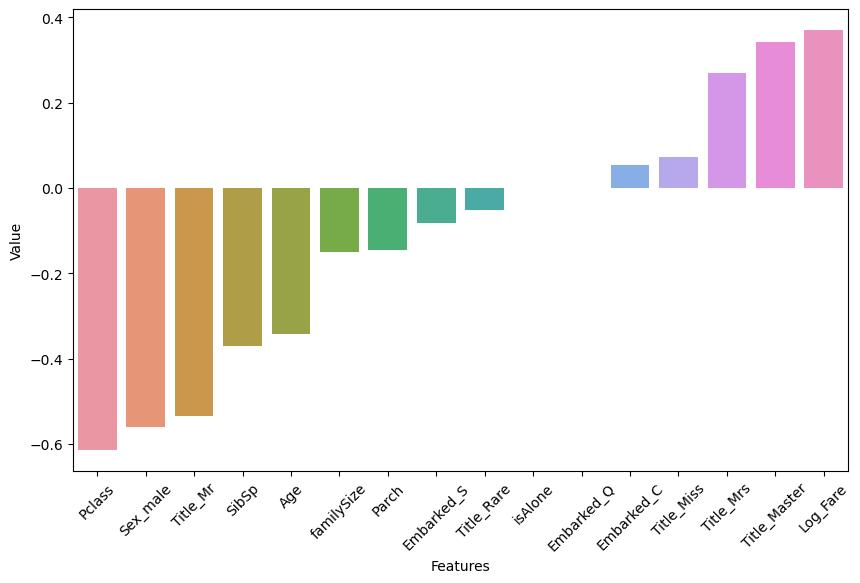

In [759]:
plt.figure(figsize=(15,5))
data = {"Features": X_train.columns, "Value": grid_model.best_estimator_.coef_[0]}
dx = pd.DataFrame(data)
dx_sorted = dx.sort_values(by="Value", ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(x=dx_sorted["Features"], y=dx_sorted["Value"], data=dx_sorted)

plt.xticks(rotation=45)
plt.show()

In [760]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [761]:
test_prediction = grid_model.predict(scaled_X_test)

In [762]:
confusion_matrix(y_test, test_prediction)

array([[88, 11],
       [14, 64]], dtype=int64)

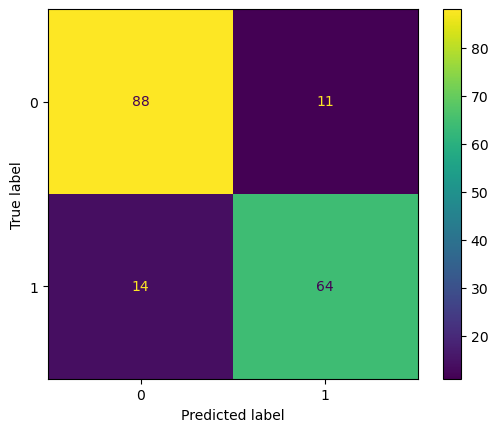

In [763]:
ConfusionMatrixDisplay(confusion_matrix(y_test, test_prediction)).plot()

In [764]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        99
           1       0.85      0.82      0.84        78

    accuracy                           0.86       177
   macro avg       0.86      0.85      0.86       177
weighted avg       0.86      0.86      0.86       177



In [765]:
X

,Pclass,Age,SibSp,Parch,Log_Fare,familySize,isAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.00000,1,0,1.981001,1,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,38.00000,1,0,4.266662,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,26.00000,0,0,2.070022,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,35.00000,1,0,3.972177,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3,35.00000,0,0,2.085672,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,2.564949,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1,19.00000,0,0,3.401197,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
888,3,25.14062,1,2,3.154870,2,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
889,1,26.00000,0,0,3.401197,1,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [766]:
scaled_X = scaler.fit_transform(X)

In [767]:
final_model = grid_model.best_estimator_.fit(scaled_X,y)

In [768]:
test_data = pd.read_csv("test.csv")

In [769]:
test_data = test_data.drop(["PassengerId", "Cabin", "Ticket"], axis=1)

In [770]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [771]:
test_data.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [772]:
test_data[test_data['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [773]:
test_data.loc[[152], "Fare"] = 0

In [774]:
## filling null age values with the Pclass category age mean value
test_data["Age"] = test_data.groupby("Pclass")["Age"].transform(lambda val: val.fillna(val.mean()))
# Normalizing Fare feature, because its skewed and 
test_data['Log_Fare'] = test_data['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
test_data = test_data.drop("Fare", axis=1)

test_data["familySize"] = test_data["Parch"] + test_data["SibSp"] + 1
test_data["isAlone"] = test_data["familySize"].apply(lambda x: 1 if x==1 else 0 )
# test_data = test_data.drop(["Parch", "SibSp"], axis=1)



In [775]:
# Grouping familysize and age values
test_data['familySize'] = pd.cut(test_data['familySize'], bins=4, labels=[1, 2, 3, 4]).astype(int)
# Assuming df is your DataFrame and 'your_column' is the column you want to bin
# test_data['Age'] = pd.cut(test_data['Age'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)



In [776]:
test_data["Title"] = test_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

test_data["Title"] = test_data["Title"].replace(["Dr", "Rev", "Major", "Col", "the Countess", "Capt", "Dona", "Jonkheer", "Lady", "Sir"], "Rare")
test_data["Title"] = test_data["Title"].replace(["Mlle", "Ms"], "Miss")
test_data["Title"] = test_data["Title"].replace("Mme", "Mrs")

test_data["Title"].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [777]:
test_data = test_data.drop("Name", axis=1)

In [778]:
test_data_hot_encoded = pd.get_dummies(test_data, dtype=float)

In [779]:
test_data_hot_encoded

,Pclass,Age,SibSp,Parch,Log_Fare,familySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,34.500000,0,0,2.057860,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,47.000000,1,0,1.945910,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,62.000000,0,0,2.270836,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,27.000000,0,0,2.159003,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3,22.000000,1,1,2.508582,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,24.027945,0,0,2.085672,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
414,1,39.000000,0,0,4.690430,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
415,3,38.500000,0,0,1.981001,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
416,3,24.027945,0,0,2.085672,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [780]:
test_data_hot_encoded = test_data_hot_encoded.drop(["Sex_female"], axis=1)

In [789]:
scaled_X_full_test = scaler.fit_transform(test_data_hot_encoded)

In [790]:
predictions = final_model.predict(scaled_X_full_test)

In [791]:
for_passengers = pd.read_csv("test.csv")
submission = pd.DataFrame({'PassengerId':for_passengers['PassengerId'],'Survived':predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [792]:
filename = 'submission_with_age_2.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_with_age_2.csv


In [793]:
from joblib import dump, load


In [794]:
dump(final_model, 'removed_outliers_logistic_gridsearch_cv.joblib') 

['removed_outliers_logistic_gridsearch_cv.joblib']